# Explore the Twitter Data

## Load the data

In [39]:
import matplotlib.pyplot as plt
import pandas as pd

In [40]:
%matplotlib inline

In [41]:
df = pd.read_csv('MachineLearning_tweets.csv')

In [42]:
df.head()

,Unnamed: 0,created_at,user,user_followers_count,text,lang,Location,retweet_count,favorite_count
0,0,2016-07-07 12:40:45,BigDataTweetBot,15648,RT @IoTJobs_eu: Google acquires Paris based ma...,en,NaN,1,0
1,1,2016-07-07 12:40:32,BigDataTweetBot,15648,RT @bobehayes: One-Third of #BigData Developer...,en,NaN,1,0
2,2,2016-07-07 12:40:20,brainchatbot,2240,RT @Le_Coeur: Comprendre le chatbot pour brill...,fr,NaN,1,0
3,3,2016-07-07 12:40:12,ExtendMore,107,"DeepMind, has started training neural networks...",en,NaN,0,1
4,4,2016-07-07 12:40:12,Sociabaaz,34,"DeepMind, has started training neural networks...",en,NaN,0,1


In [76]:
df = df[["created_at","user","text"]]

## Wordcloud

In [77]:
import nltk
from wordcloud import WordCloud

In [78]:
sentence = df["text"][0]
sentence

'RT @IoTJobs_eu: Google acquires Paris based machine learning startup Moodstocks https://t.co/u2K6SSbgYO #IoT #news #career #jobs #bigdata'

In [79]:
tokens = nltk.wordpunct_tokenize(sentence)
tokens

['RT',
 '@',
 'IoTJobs_eu',
 ':',
 'Google',
 'acquires',
 'Paris',
 'based',
 'machine',
 'learning',
 'startup',
 'Moodstocks',
 'https',
 '://',
 't',
 '.',
 'co',
 '/',
 'u2K6SSbgYO',
 '#',
 'IoT',
 '#',
 'news',
 '#',
 'career',
 '#',
 'jobs',
 '#',
 'bigdata']

Tokenize all words

In [80]:
frequency_words = {}

In [81]:
for data in df['text']:
    tokens = nltk.wordpunct_tokenize(data)
    for token in tokens:
        if token in frequency_words:
            count = frequency_words[token]
            count = count + 1
            frequency_words[token] = count
        else:
            frequency_words[token] = 1

In [82]:
# Let us see the frequency_words for each word occuring
frequency_words

{'uIKp4eZZLx': 1,
 '@...': 2,
 '\xe8\xb2': 2,
 'Toubro': 1,
 'InfoSec': 1,
 'NCKgAbTakf': 1,
 'machine\xe2': 2,
 '\xe8\xaa': 2,
 'Larsen': 1,
 'phone\xe2': 13,
 'B2B': 1,
 '1dx5a8nKnR': 2,
 '4Bsh3ihKxZ': 1,
 'LRujhtDfOc': 1,
 'oO\xe2': 6,
 'Iz5Q6FEug2': 2,
 'Watch': 2,
 'Langford': 4,
 'Sheets': 2,
 'bpulsetech': 1,
 'Apache': 5,
 'f\xc3\xbcr': 2,
 'xYqCGJw63R': 1,
 'worth': 1,
 '@': 762,
 'WMTevZtFFj': 2,
 'YM': 1,
 'dutch': 1,
 'freyduni': 25,
 'ieGQYQiRlL': 1,
 'TechLifeIreland': 3,
 'JmTFTlMrKC': 1,
 'Co': 1,
 'dr\xc3': 1,
 'Steal': 1,
 'Cxj22Q4M9J': 2,
 'NerdTech': 3,
 'eeJOXS05Hi': 1,
 'progression': 1,
 'skills': 2,
 'by\xe2': 1,
 'companies': 2,
 'solution': 1,
 'Z\xe2': 1,
 '\x8f\xb7': 1,
 'FMj2LT22qL': 4,
 'announced': 2,
 'enhance': 1,
 'GHAUganda16': 3,
 'Z4rtznkChy': 1,
 'HGBbe6xl3m': 2,
 '8HeyYKL3LR': 1,
 'leaders': 1,
 'BAPNnephrology': 1,
 'rusty': 1,
 'ais': 3,
 'TyzkdX7n0q': 1,
 'n': 1,
 '+': 4,
 'j_pennett': 1,
 'sung': 1,
 'Visual': 2,
 'XUXrq3Ezdk': 1,
 'ySwIL9Z5Jg

In [83]:
# Creating a Wordcloud
wordcloud = WordCloud()

In [84]:
wordcloud.generate_from_frequencies(frequency_words.items())

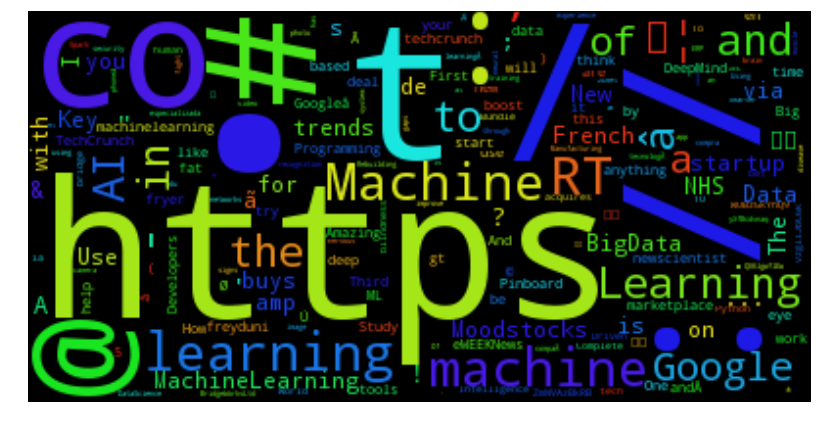

In [85]:
plt.figure(figsize=(14,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Refine the data

Preprocessing

In [86]:
df['text_preprocessed'] = df['text'].str.replace('[^\w\s]',' ')

In [87]:
df.head()

,created_at,user,text,text_preprocessed
0,2016-07-07 12:40:45,BigDataTweetBot,RT @IoTJobs_eu: Google acquires Paris based ma...,RT IoTJobs_eu Google acquires Paris based ma...
1,2016-07-07 12:40:32,BigDataTweetBot,RT @bobehayes: One-Third of #BigData Developer...,RT bobehayes One Third of BigData Developer...
2,2016-07-07 12:40:20,brainchatbot,RT @Le_Coeur: Comprendre le chatbot pour brill...,RT Le_Coeur Comprendre le chatbot pour brill...
3,2016-07-07 12:40:12,ExtendMore,"DeepMind, has started training neural networks...",DeepMind has started training neural networks...
4,2016-07-07 12:40:12,Sociabaaz,"DeepMind, has started training neural networks...",DeepMind has started training neural networks...


# Remove Stopword

In [88]:
from nltk.corpus import stopwords

In [89]:
stop = stopwords.words('english')

In [90]:
frequency_words_wo_stop = {}
for data in df['text_preprocessed']:
    tokens = nltk.wordpunct_tokenize(data)
    for token in tokens:
        if token.lower() not in stop:
            if token in frequency_words_wo_stop:
                count = frequency_words_wo_stop[token]
                count = count + 1
                frequency_words_wo_stop[token] = count
            else:
                frequency_words_wo_stop[token] = 1

In [91]:
wordcloud.generate_from_frequencies(frequency_words_wo_stop.items())

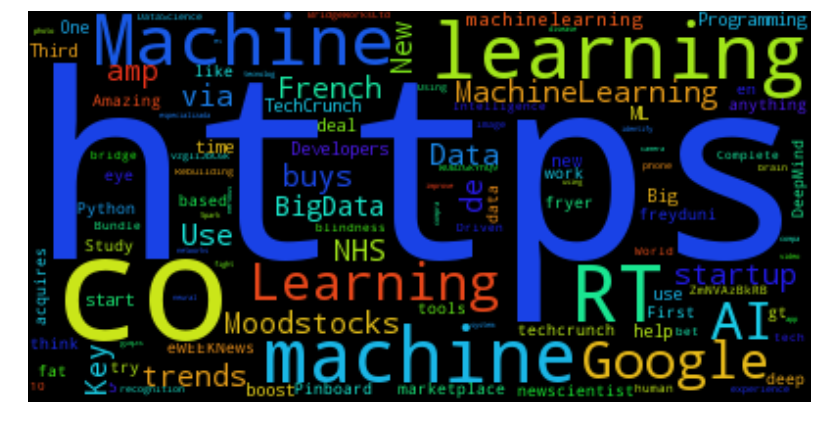

In [92]:
plt.figure(figsize=(14,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [93]:
df['text_tokens'] = df.apply(generate_word_frequency,axis=1)

In [94]:
df.head()

,created_at,user,text,text_preprocessed,text_tokens
0,2016-07-07 12:40:45,BigDataTweetBot,RT @IoTJobs_eu: Google acquires Paris based ma...,RT IoTJobs_eu Google acquires Paris based ma...,"rt,iotjobs_eu,google,acquires,paris,based,mach..."
1,2016-07-07 12:40:32,BigDataTweetBot,RT @bobehayes: One-Third of #BigData Developer...,RT bobehayes One Third of BigData Developer...,"rt,bobehayes,one,third,bigdata,developers,use,..."
2,2016-07-07 12:40:20,brainchatbot,RT @Le_Coeur: Comprendre le chatbot pour brill...,RT Le_Coeur Comprendre le chatbot pour brill...,"rt,le_coeur,comprendre,le,chatbot,pour,briller..."
3,2016-07-07 12:40:12,ExtendMore,"DeepMind, has started training neural networks...",DeepMind has started training neural networks...,"deepmind,started,training,neural,networks,reco..."
4,2016-07-07 12:40:12,Sociabaaz,"DeepMind, has started training neural networks...",DeepMind has started training neural networks...,"deepmind,started,training,neural,networks,reco..."


In [95]:
wordcloud.generate_from_frequencies(frequency_words_wo_stop.items())

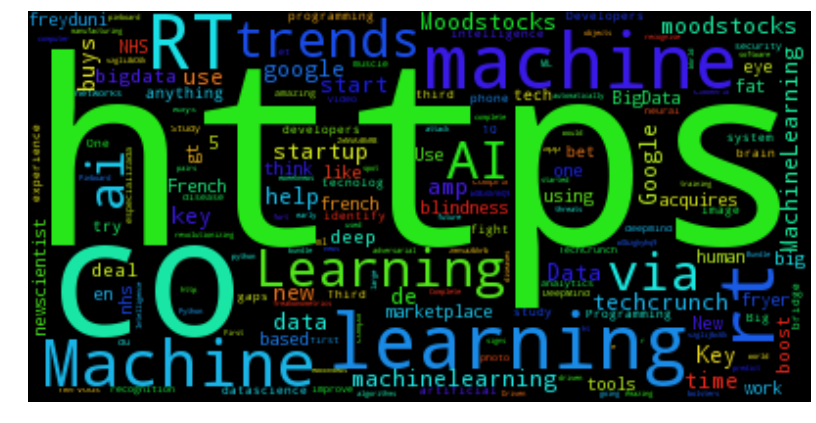

In [96]:
plt.figure(figsize=(14,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [97]:
stop.extend(('.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}','/','-'))

In [98]:
frequency_words_wo_stop = {}

In [99]:
def generate_word_frequency(row):
    data = row['text_preprocessed']
    tokens = nltk.wordpunct_tokenize(data)
    token_list = []
    for token in tokens:
        if token.lower() not in stop:
            token_list.append(token.lower())
            if token.lower() in frequency_words_wo_stop:
                count = frequency_words_wo_stop[token.lower()]
                count = count + 1
                frequency_words_wo_stop[token.lower()] = count
            else:
                frequency_words_wo_stop[token.lower()] = 1
    
    return ','.join(token_list)

In [100]:
df['text_tokens'] = df.apply(generate_word_frequency,axis=1)

In [101]:
df.head()

,created_at,user,text,text_preprocessed,text_tokens
0,2016-07-07 12:40:45,BigDataTweetBot,RT @IoTJobs_eu: Google acquires Paris based ma...,RT IoTJobs_eu Google acquires Paris based ma...,"rt,iotjobs_eu,google,acquires,paris,based,mach..."
1,2016-07-07 12:40:32,BigDataTweetBot,RT @bobehayes: One-Third of #BigData Developer...,RT bobehayes One Third of BigData Developer...,"rt,bobehayes,one,third,bigdata,developers,use,..."
2,2016-07-07 12:40:20,brainchatbot,RT @Le_Coeur: Comprendre le chatbot pour brill...,RT Le_Coeur Comprendre le chatbot pour brill...,"rt,le_coeur,comprendre,le,chatbot,pour,briller..."
3,2016-07-07 12:40:12,ExtendMore,"DeepMind, has started training neural networks...",DeepMind has started training neural networks...,"deepmind,started,training,neural,networks,reco..."
4,2016-07-07 12:40:12,Sociabaaz,"DeepMind, has started training neural networks...",DeepMind has started training neural networks...,"deepmind,started,training,neural,networks,reco..."


In [102]:
wordcloud.generate_from_frequencies(frequency_words_wo_stop.items())

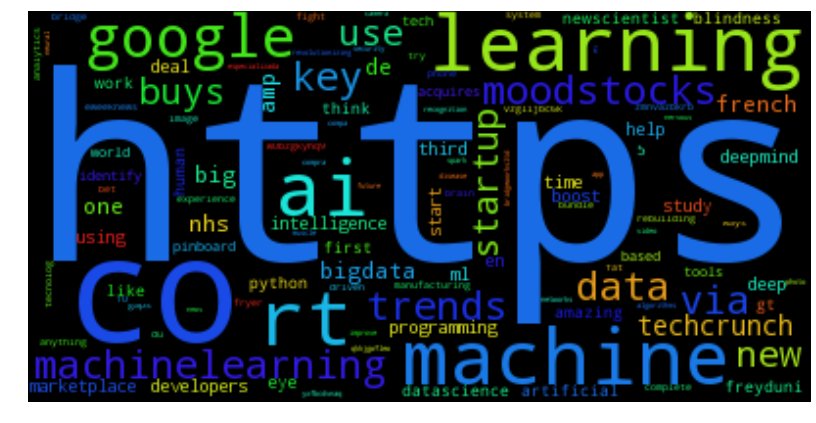

In [103]:
plt.figure(figsize=(14,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Stemming

In [104]:
from nltk.stem.porter import PorterStemmer

In [107]:
porter_stemmer = PorterStemmer()

In [137]:
def stem(row):
    text_stem =""
    text_tokens = nltk.wordpunct_tokenize(row['text_preprocessed'])
    for token in text_tokens:
        text_stem = text_stem + " " + porter_stemmer.stem(token)
    return text_stem

In [138]:
df['text_stem'] = df.apply(stem,axis=1)

In [139]:
df.head()

,created_at,user,text,text_preprocessed,text_tokens,text_stem
0,2016-07-07 12:40:45,BigDataTweetBot,RT @IoTJobs_eu: Google acquires Paris based ma...,RT IoTJobs_eu Google acquires Paris based ma...,"rt,iotjobs_eu,google,acquires,paris,based,mach...",RT IoTJobs_eu Googl acquir Pari base machin l...
1,2016-07-07 12:40:32,BigDataTweetBot,RT @bobehayes: One-Third of #BigData Developer...,RT bobehayes One Third of BigData Developer...,"rt,bobehayes,one,third,bigdata,developers,use,...",RT bobehay One Third of BigData Develop Use M...
2,2016-07-07 12:40:20,brainchatbot,RT @Le_Coeur: Comprendre le chatbot pour brill...,RT Le_Coeur Comprendre le chatbot pour brill...,"rt,le_coeur,comprendre,le,chatbot,pour,briller...",RT Le_Coeur Comprendr le chatbot pour briller...
3,2016-07-07 12:40:12,ExtendMore,"DeepMind, has started training neural networks...",DeepMind has started training neural networks...,"deepmind,started,training,neural,networks,reco...",DeepMind ha start train neural network to rec...
4,2016-07-07 12:40:12,Sociabaaz,"DeepMind, has started training neural networks...",DeepMind has started training neural networks...,"deepmind,started,training,neural,networks,reco...",DeepMind ha start train neural network to rec...


## Lemmatization

In [140]:
from nltk.stem import WordNetLemmatizer

In [141]:
wordnet_lemmatizer = WordNetLemmatizer()

In [145]:
def lemmatize(row):
    text_lemmatize =""
    text_tokens = nltk.wordpunct_tokenize(row['text_preprocessed'])
    for token in text_tokens:
        text_lemmatize = text_lemmatize + " " + wordnet_lemmatizer.lemmatize(token)
    return text_lemmatize
    

In [146]:
df['text_lemmatize'] = df.apply(lemmatize,axis=1)

In [147]:
df.head()

,created_at,user,text,text_preprocessed,text_tokens,text_stem,text_lemmatize
0,2016-07-07 12:40:45,BigDataTweetBot,RT @IoTJobs_eu: Google acquires Paris based ma...,RT IoTJobs_eu Google acquires Paris based ma...,"rt,iotjobs_eu,google,acquires,paris,based,mach...",RT IoTJobs_eu Googl acquir Pari base machin l...,RT IoTJobs_eu Google acquires Paris based mac...
1,2016-07-07 12:40:32,BigDataTweetBot,RT @bobehayes: One-Third of #BigData Developer...,RT bobehayes One Third of BigData Developer...,"rt,bobehayes,one,third,bigdata,developers,use,...",RT bobehay One Third of BigData Develop Use M...,RT bobehayes One Third of BigData Developers ...
2,2016-07-07 12:40:20,brainchatbot,RT @Le_Coeur: Comprendre le chatbot pour brill...,RT Le_Coeur Comprendre le chatbot pour brill...,"rt,le_coeur,comprendre,le,chatbot,pour,briller...",RT Le_Coeur Comprendr le chatbot pour briller...,RT Le_Coeur Comprendre le chatbot pour brille...
3,2016-07-07 12:40:12,ExtendMore,"DeepMind, has started training neural networks...",DeepMind has started training neural networks...,"deepmind,started,training,neural,networks,reco...",DeepMind ha start train neural network to rec...,DeepMind ha started training neural network t...
4,2016-07-07 12:40:12,Sociabaaz,"DeepMind, has started training neural networks...",DeepMind has started training neural networks...,"deepmind,started,training,neural,networks,reco...",DeepMind ha start train neural network to rec...,DeepMind ha started training neural network t...


# POS tagging

In [155]:
import nltk

In [156]:
def pos_tag(row):
    text_pos_tag =""
    text_tokens = nltk.wordpunct_tokenize(row['text_preprocessed'])
    text_pos_tag = nltk.pos_tag(text_tokens)
    return text_pos_tag

In [157]:
df['pos_tags'] = df.apply(pos_tag,axis=1)

In [158]:
df.head()

,created_at,user,text,text_preprocessed,text_tokens,text_stem,text_lemmatize,pos_tags
0,2016-07-07 12:40:45,BigDataTweetBot,RT @IoTJobs_eu: Google acquires Paris based ma...,RT IoTJobs_eu Google acquires Paris based ma...,"rt,iotjobs_eu,google,acquires,paris,based,mach...",RT IoTJobs_eu Googl acquir Pari base machin l...,RT IoTJobs_eu Google acquires Paris based mac...,"[(RT, NN), (IoTJobs_eu, NNP), (Google, NNP), (..."
1,2016-07-07 12:40:32,BigDataTweetBot,RT @bobehayes: One-Third of #BigData Developer...,RT bobehayes One Third of BigData Developer...,"rt,bobehayes,one,third,bigdata,developers,use,...",RT bobehay One Third of BigData Develop Use M...,RT bobehayes One Third of BigData Developers ...,"[(RT, NN), (bobehayes, NNS), (One, CD), (Third..."
2,2016-07-07 12:40:20,brainchatbot,RT @Le_Coeur: Comprendre le chatbot pour brill...,RT Le_Coeur Comprendre le chatbot pour brill...,"rt,le_coeur,comprendre,le,chatbot,pour,briller...",RT Le_Coeur Comprendr le chatbot pour briller...,RT Le_Coeur Comprendre le chatbot pour brille...,"[(RT, NN), (Le_Coeur, NNP), (Comprendre, NNP),..."
3,2016-07-07 12:40:12,ExtendMore,"DeepMind, has started training neural networks...",DeepMind has started training neural networks...,"deepmind,started,training,neural,networks,reco...",DeepMind ha start train neural network to rec...,DeepMind ha started training neural network t...,"[(DeepMind, NNP), (has, VBZ), (started, VBN), ..."
4,2016-07-07 12:40:12,Sociabaaz,"DeepMind, has started training neural networks...",DeepMind has started training neural networks...,"deepmind,started,training,neural,networks,reco...",DeepMind ha start train neural network to rec...,DeepMind ha started training neural network t...,"[(DeepMind, NNP), (has, VBZ), (started, VBN), ..."


## Entity Extraction

In [159]:
def get_entities(row):
    entities=[]
    chunked_tree = nltk.ne_chunk(row.pos_tags,binary=True)
    for nodes in chunked_tree:
        if type(nodes) == nltk.tree.Tree:
            if(nodes.label()) == 'NE':
                print("Before zip",nodes.leaves())
                zipped_list = list(zip(*nodes.leaves()))
                print("After zip",zipped_list)
                entities.append(' '.join(zipped_list[0]))
    return entities

In [160]:
df['text_named_entities'] = df.apply(get_entities,axis=1)

('Before zip', [('RT', 'NN')])
('After zip', [('RT',), ('NN',)])
('Before zip', [('IoTJobs_eu', 'NNP'), ('Google', 'NNP')])
('After zip', [('IoTJobs_eu', 'Google'), ('NNP', 'NNP')])
('Before zip', [('Paris', 'NNP')])
('After zip', [('Paris',), ('NNP',)])
('Before zip', [('u2K6SSbgYO', 'NNP')])
('After zip', [('u2K6SSbgYO',), ('NNP',)])
('Before zip', [('IoT', 'NNP')])
('After zip', [('IoT',), ('NNP',)])
('Before zip', [('RT', 'NN')])
('After zip', [('RT',), ('NN',)])
('Before zip', [('BigData', 'NNP'), ('Developers', 'NNP'), ('Use', 'NNP')])
('After zip', [('BigData', 'Developers', 'Use'), ('NNP', 'NNP', 'NNP')])
('Before zip', [('jsfNxtFvmg', 'NNP')])
('After zip', [('jsfNxtFvmg',), ('NNP',)])
('Before zip', [('RT', 'NN'), ('Le_Coeur', 'NNP'), ('Comprendre', 'NNP')])
('After zip', [('RT', 'Le_Coeur', 'Comprendre'), ('NN', 'NNP', 'NNP')])
('Before zip', [('WMTevZtFFj', 'NNP')])
('After zip', [('WMTevZtFFj',), ('NNP',)])
('Before zip', [('DeepMind', 'NNP')])
('After zip', [('DeepMind',)

In [161]:
df.head()

,created_at,user,text,text_preprocessed,text_tokens,text_stem,text_lemmatize,pos_tags,text_named_entities
0,2016-07-07 12:40:45,BigDataTweetBot,RT @IoTJobs_eu: Google acquires Paris based ma...,RT IoTJobs_eu Google acquires Paris based ma...,"rt,iotjobs_eu,google,acquires,paris,based,mach...",RT IoTJobs_eu Googl acquir Pari base machin l...,RT IoTJobs_eu Google acquires Paris based mac...,"[(RT, NN), (IoTJobs_eu, NNP), (Google, NNP), (...","[RT, IoTJobs_eu Google, Paris, u2K6SSbgYO, IoT]"
1,2016-07-07 12:40:32,BigDataTweetBot,RT @bobehayes: One-Third of #BigData Developer...,RT bobehayes One Third of BigData Developer...,"rt,bobehayes,one,third,bigdata,developers,use,...",RT bobehay One Third of BigData Develop Use M...,RT bobehayes One Third of BigData Developers ...,"[(RT, NN), (bobehayes, NNS), (One, CD), (Third...","[RT, BigData Developers Use, jsfNxtFvmg]"
2,2016-07-07 12:40:20,brainchatbot,RT @Le_Coeur: Comprendre le chatbot pour brill...,RT Le_Coeur Comprendre le chatbot pour brill...,"rt,le_coeur,comprendre,le,chatbot,pour,briller...",RT Le_Coeur Comprendr le chatbot pour briller...,RT Le_Coeur Comprendre le chatbot pour brille...,"[(RT, NN), (Le_Coeur, NNP), (Comprendre, NNP),...","[RT Le_Coeur Comprendre, WMTevZtFFj]"
3,2016-07-07 12:40:12,ExtendMore,"DeepMind, has started training neural networks...",DeepMind has started training neural networks...,"deepmind,started,training,neural,networks,reco...",DeepMind ha start train neural network to rec...,DeepMind ha started training neural network t...,"[(DeepMind, NNP), (has, VBZ), (started, VBN), ...","[DeepMind, uX1BV87m3q AI]"
4,2016-07-07 12:40:12,Sociabaaz,"DeepMind, has started training neural networks...",DeepMind has started training neural networks...,"deepmind,started,training,neural,networks,reco...",DeepMind ha start train neural network to rec...,DeepMind ha started training neural network t...,"[(DeepMind, NNP), (has, VBZ), (started, VBN), ...","[DeepMind, pzaFWsDAj7 AI]"


In [ ]:
df.to_csv('.csv',index=False)